<a href="https://colab.research.google.com/github/sangwainupur/aicure_petrichorai/blob/main/aicure_petrichorai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import io
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [12]:
pip install tensorflow_decision_forests


In [13]:
import tensorflow_decision_forests as tfdf

# **Loading Data**

In [14]:

with io.open('/content/drive/MyDrive/aicure/train_data.csv', 'r', encoding='utf-8') as f:
  data = pd.read_csv(f)


print(data.head())


                                   uuid          VLF    VLF_PCT           LF  \
0  4a122afe-6e52-4ed0-840d-66155da95ba1  2259.833995  67.884986  1058.573968   
1  0848f722-52ec-420c-adb1-a1e90a2e2709  2430.367576  60.980572  1541.466293   
2  7814286a-f939-45a7-8620-82b339a7ad4b   989.800997  27.651929  2478.164707   
3  de843d67-0ed3-4dfe-af91-78923dc31810  2025.914557  57.014236  1464.561241   
4  ba117ec1-3de8-4da3-a315-4c7716589439  1576.443907  71.274370   619.624143   

      LF_PCT      LF_NU          HF    HF_PCT     HF_NU           TP  ...  \
0  31.799362  99.017120   10.507787  0.315652  0.982880  3328.915749  ...   
1  38.677070  99.122594   13.644635  0.342359  0.877406  3985.478504  ...   
2  69.232133  95.693128  111.535043  3.115939  4.306872  3579.500746  ...   
3  41.216368  95.883762   62.872820  1.769396  4.116238  3553.348618  ...   
4  28.014521  97.524479   15.728281  0.711109  2.475521  2211.796331  ...   

       KURT      SKEW  MEAN_REL_RR  MEDIAN_REL_RR  SDRR_

# **Exploratory Data Analysis (EDA)**

Understanding the structure

In [15]:
data.shape

(5000, 37)

In [16]:
data.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               5000 non-null   object 
 1   VLF                5000 non-null   float64
 2   VLF_PCT            5000 non-null   float64
 3   LF                 5000 non-null   float64
 4   LF_PCT             5000 non-null   float64
 5   LF_NU              5000 non-null   float64
 6   HF                 5000 non-null   float64
 7   HF_PCT             5000 non-null   float64
 8   HF_NU              5000 non-null   float64
 9   TP                 5000 non-null   float64
 10  LF_HF              5000 non-null   float64
 11  HF_LF              5000 non-null   float64
 12  SD1                5000 non-null   float64
 13  SD2                5000 non-null   float64
 14  sampen             5000 non-null   float64
 15  higuci             5000 non-null   float64
 16  datasetId          5000 

In [27]:
feature_columns = data.columns

label_columns = list(feature_columns)
print(label_columns)

['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci', 'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR']


In [28]:
data.isnull().sum()

uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

We observe that the dataset does not have null values for any feature

In [29]:
[features for features in data.columns if data[features].isnull().sum()>0]

[]

In [30]:
data.describe()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2242.846274,64.618473,944.666618,33.756563,95.513467,39.787329,1.624964,4.486533,3227.300221,111.958521,...,0.564676,0.070378,5.114420e-07,-0.000448,0.018638,0.009758,0.009758,2.005098,0.564676,0.070378
std,1853.845285,16.858102,572.705322,16.121002,4.200091,46.887627,1.793648,4.200091,1957.986129,330.772146,...,1.738594,0.706996,1.662361e-04,0.000878,0.005468,0.003953,0.003953,0.378332,1.738594,0.706996
min,182.001656,19.492924,105.352082,2.218141,70.677164,0.063182,0.002234,0.013127,393.870306,2.410311,...,-1.851368,-2.130673,-1.049175e-03,-0.004361,0.008992,0.003645,0.003645,1.188950,-1.851368,-2.130673
25%,1009.686180,52.998781,547.027436,21.775991,93.560684,10.946137,0.347487,1.241594,1863.994785,14.529600,...,-0.347156,-0.340853,-7.130486e-05,-0.000911,0.014335,0.006999,0.006999,1.744527,-0.347156,-0.340853
50%,1705.183308,66.792593,779.619006,31.364370,96.583947,24.939947,1.023576,3.416053,2826.860362,28.273553,...,0.065799,-0.042454,1.639271e-06,-0.000297,0.017363,0.008766,0.008766,1.936696,0.065799,-0.042454
75%,2678.847972,77.328811,1199.089822,44.458585,98.758406,45.549542,2.276872,6.439316,4085.011726,79.541694,...,0.782407,0.342719,6.955046e-05,0.000161,0.021882,0.011538,0.011537,2.220642,0.782407,0.342719
max,12278.649761,97.703187,3211.424686,77.507972,99.986873,359.927420,12.533266,29.322836,13119.276456,7617.164272,...,16.367846,3.626919,9.518686e-04,0.002038,0.036017,0.026660,0.026660,3.676899,16.367846,3.626919


In [31]:
print(data.condition.value_counts())

no stress        2709
interruption     1387
time pressure     904
Name: condition, dtype: int64


In [ ]:
#data.replace({'no stress': 0, 'interruption': 1, 'time pressure': 2}, inplace = True)

In [32]:
data['condition']

0       interruption
1       interruption
2       interruption
3          no stress
4       interruption
            ...     
4995       no stress
4996    interruption
4997       no stress
4998       no stress
4999       no stress
Name: condition, Length: 5000, dtype: object

<ipython-input-33-d6571c0921ab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['HR'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='HR', ylabel='Density'>

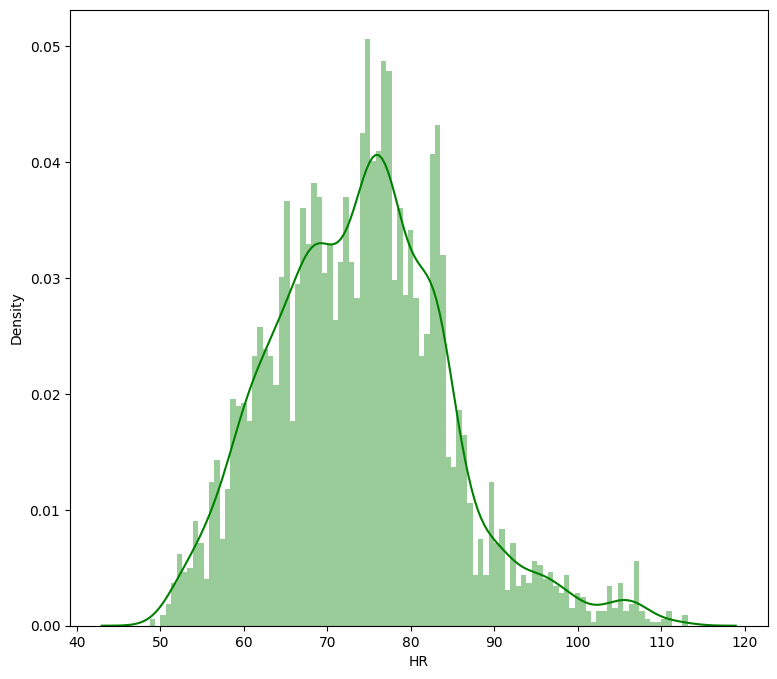

In [33]:
plt.figure(figsize=(9, 8))
sns.distplot(data['HR'], color='g', bins=100, hist_kws={'alpha': 0.4})

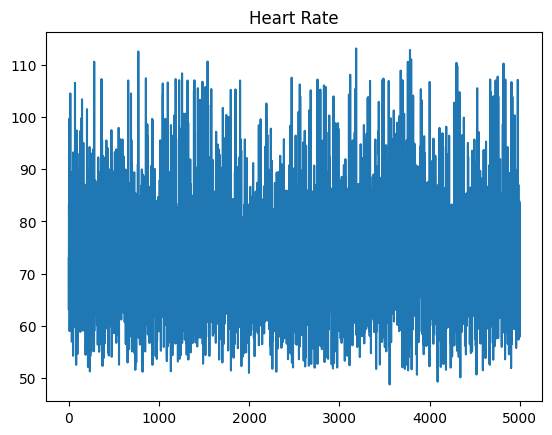

In [34]:
plt.plot(data['HR'])
plt.title('Heart Rate')
plt.show()

array([[<Axes: title={'center': 'VLF'}>,
        <Axes: title={'center': 'VLF_PCT'}>,
        <Axes: title={'center': 'LF'}>,
        <Axes: title={'center': 'LF_PCT'}>,
        <Axes: title={'center': 'LF_NU'}>,
        <Axes: title={'center': 'HF'}>],
       [<Axes: title={'center': 'HF_PCT'}>,
        <Axes: title={'center': 'HF_NU'}>,
        <Axes: title={'center': 'TP'}>,
        <Axes: title={'center': 'LF_HF'}>,
        <Axes: title={'center': 'HF_LF'}>,
        <Axes: title={'center': 'SD1'}>],
       [<Axes: title={'center': 'SD2'}>,
        <Axes: title={'center': 'sampen'}>,
        <Axes: title={'center': 'higuci'}>,
        <Axes: title={'center': 'datasetId'}>,
        <Axes: title={'center': 'MEAN_RR'}>,
        <Axes: title={'center': 'MEDIAN_RR'}>],
       [<Axes: title={'center': 'SDRR'}>,
        <Axes: title={'center': 'RMSSD'}>,
        <Axes: title={'center': 'SDSD'}>,
        <Axes: title={'center': 'SDRR_RMSSD'}>,
        <Axes: title={'center': 'HR'}>,
       

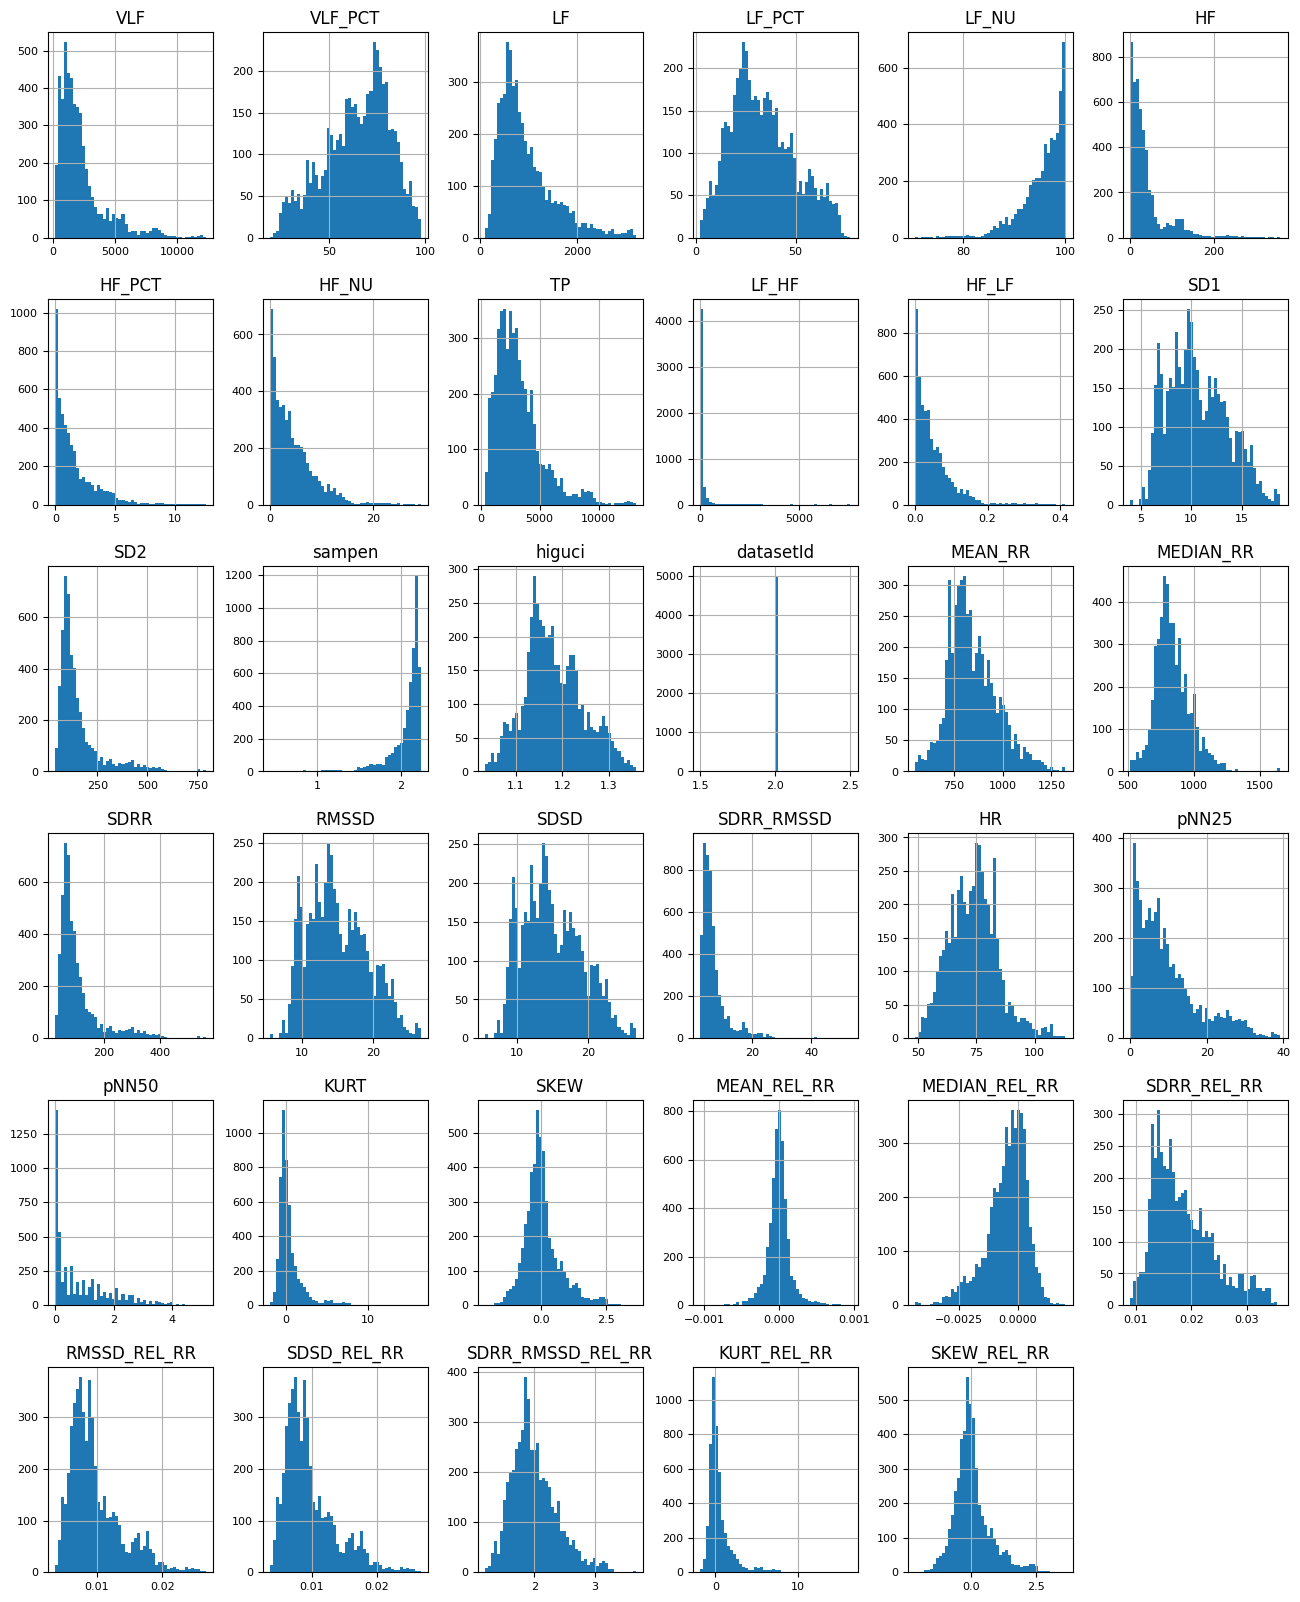

In [35]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

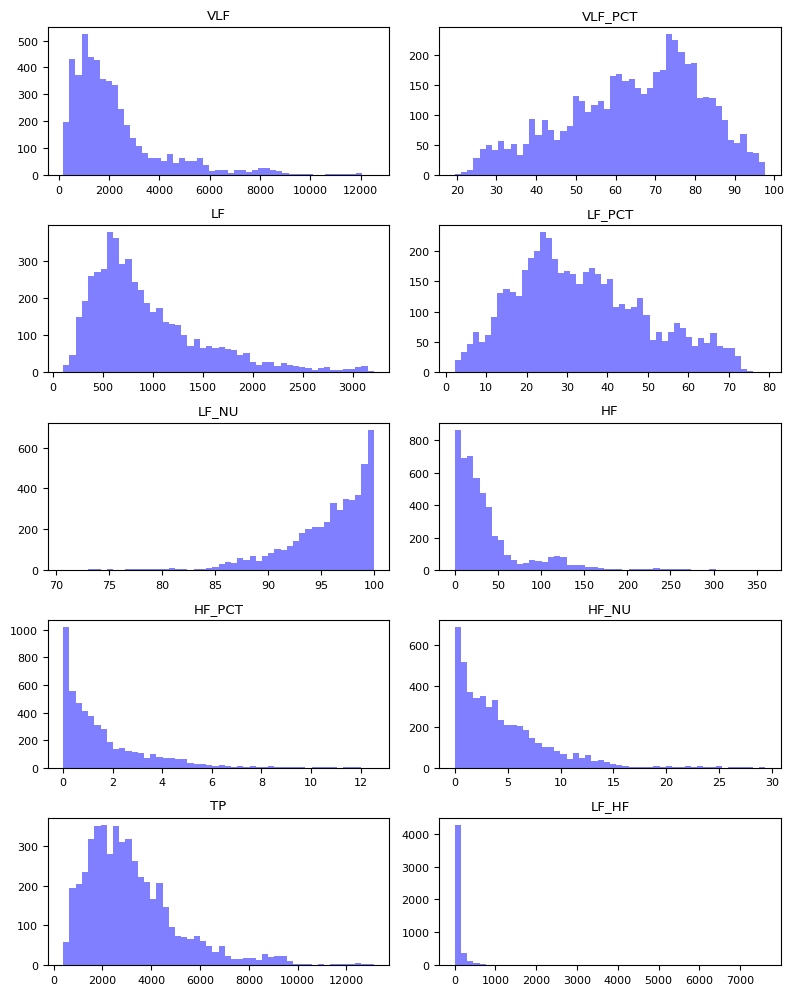

In [36]:
#label_columns = 'label'

features_to_visualize = ['MEDIAN_RR', 'MEAN_RR', 'HF_PCT', 'HF_LF', 'LF_HF', 'HF_NU', 'LF_NU', 'HF', 'SDRR_RMSSD_REL_RR', 'SDSD_REL_RR']


feature_columns = data.columns[1:]


plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()


for idx, ax in enumerate(axes):
    ax.figure
    numeric_values = pd.to_numeric(data[feature_columns[idx]], errors='coerce').dropna()

    if not numeric_values.empty:
        binwidth = (max(numeric_values) - min(numeric_values)) / 50

        # Plot the histogram for each feature
        ax.hist(numeric_values, bins=np.arange(min(numeric_values), max(numeric_values) + binwidth, binwidth),
                alpha=0.5, color='blue')
        ax.set_title(feature_columns[idx])

plt.tight_layout()
plt.show()

In [37]:
data.groupby(['HR','condition']).size()

HR          condition    
48.743153   time pressure    1
49.278204   time pressure    1
50.101326   time pressure    1
50.616525   time pressure    1
50.647153   time pressure    1
                            ..
110.682548  interruption     1
111.089674  interruption     1
112.600632  interruption     1
112.897918  interruption     1
113.178390  interruption     1
Length: 5000, dtype: int64

<ipython-input-38-9cfc45fef0b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

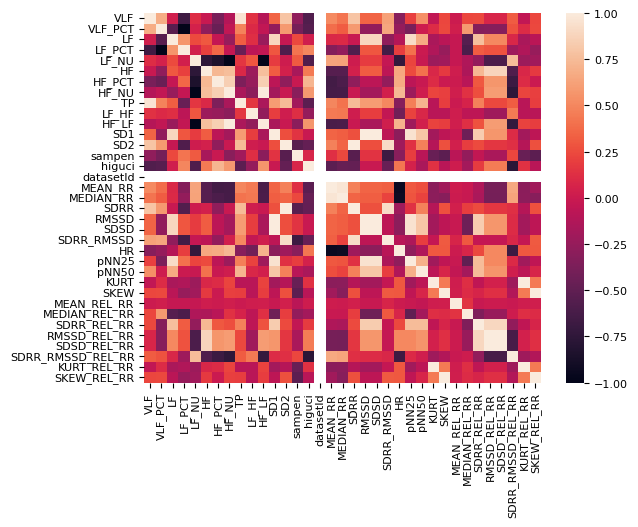

In [38]:
correlation = data.corr()
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = False)

Dropping columns that do not contribute to the changing heartrate i.e. datasetId


In [39]:
data = data.drop('datasetId', axis=1)

In [40]:
data.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD',
       'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

In [41]:
#X = data.iloc[:, 1:]
#Y = data['HR']

In [42]:
X = data.drop('HR', axis=1)
X=X.drop('uuid', axis=1)  # Features (all columns except 'HR' and 'uuid')
y = data['HR']

In [43]:
X.columns

Index(['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
       'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci', 'condition',
       'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25',
       'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR',
       'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR',
       'SKEW_REL_RR'],
      dtype='object')

In [44]:
y

0       72.947850
1       63.063063
2       83.191736
3       80.828414
4       76.299115
          ...    
4995    83.920808
4996    79.969017
4997    57.844321
4998    66.656028
4999    83.364080
Name: HR, Length: 5000, dtype: float64

# One Hot Encoding


In [45]:
categorical_columns = ['condition']
condition_index = X.columns.get_loc('condition')
print(condition_index)
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(),[condition_index])
    ],
    remainder='passthrough'  # Keep the non-categorical columns as they are
)
X = pd.DataFrame(preprocessor.fit_transform(X), columns=preprocessor.get_feature_names_out())

15


# Splitting the data into train and validation sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X.head(5)

,encoder__condition_interruption,encoder__condition_no stress,encoder__condition_time pressure,remainder__VLF,remainder__VLF_PCT,remainder__LF,remainder__LF_PCT,remainder__LF_NU,remainder__HF,remainder__HF_PCT,...,remainder__KURT,remainder__SKEW,remainder__MEAN_REL_RR,remainder__MEDIAN_REL_RR,remainder__SDRR_REL_RR,remainder__RMSSD_REL_RR,remainder__SDSD_REL_RR,remainder__SDRR_RMSSD_REL_RR,remainder__KURT_REL_RR,remainder__SKEW_REL_RR
0,1.0,0.0,0.0,2259.833995,67.884986,1058.573968,31.799362,99.017120,10.507787,0.315652,...,-0.812408,-0.156490,-0.000055,-0.000191,0.017395,0.007729,0.007729,2.250533,-0.812408,-0.156490
1,1.0,0.0,0.0,2430.367576,60.980572,1541.466293,38.677070,99.122594,13.644635,0.342359,...,0.014594,-0.595771,-0.000035,-0.000671,0.021513,0.011262,0.011262,1.910181,0.014594,-0.595771
2,1.0,0.0,0.0,989.800997,27.651929,2478.164707,69.232133,95.693128,111.535043,3.115939,...,-0.470107,0.170303,0.000080,-0.001355,0.029976,0.015781,0.015781,1.899494,-0.470107,0.170303
3,0.0,1.0,0.0,2025.914557,57.014236,1464.561241,41.216368,95.883762,62.872820,1.769396,...,0.176038,-0.506675,0.000024,0.000587,0.023851,0.011562,0.011562,2.062848,0.176038,-0.506675
4,1.0,0.0,0.0,1576.443907,71.274370,619.624143,28.014521,97.524479,15.728281,0.711109,...,0.410326,0.208714,-0.000109,-0.000151,0.014282,0.007043,0.007043,2.027828,0.410326,0.208714


PCA

In [ ]:
# from sklearn.decomposition import PCA

# pca=PCA(n_components=10)

# X_train=pca.fit_transform(X_train)
# X_test=pca.transform(X_test)



# Model Training

#XGBoost

In [114]:
xgb_model = XGBRegressor()


xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

In [115]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.26623196850810904
Mean Absolute Error: 0.3210510026324215


Mean Squared Error using XGBoost comes out to be 0.26623196850810904, now we try using Random Forest and do a comparative analysis



---



#Random Forest

In [51]:
dataset_df = data.drop('uuid', axis=1)

In [52]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

3492 examples in training, 1508 examples in testing.


In [53]:
label = 'HR'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [54]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [57]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse", "mae"])

Use /tmp/tmpoekwu9wr as temporary training directory


In [58]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:01.043413. Found 3492 examples.
Training model...
Model trained in 0:00:11.251748
Compiling model...
Model compiled.


In [76]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

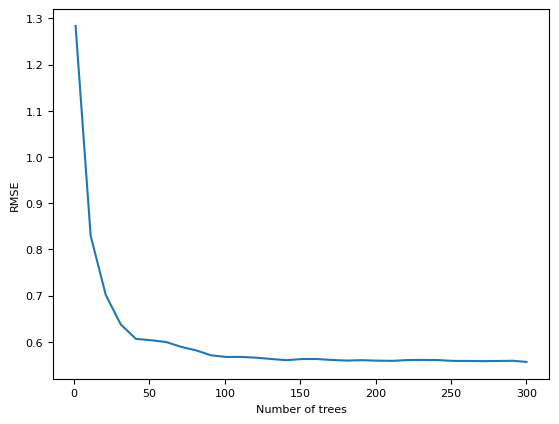

In [60]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE")
plt.show()

In [61]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 1s 41ms/step - loss: 0.0000e+00 - mse: 0.3135 - mae: 0.2676
loss: 0.0000
mse: 0.3135
mae: 0.2676


In [62]:
inspector = rf.make_inspector()
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_NODES
	 SUM_SCORE
	 NUM_AS_ROOT
	 INV_MEAN_MIN_DEPTH


 The larger the importance score for NUM_AS_ROOT, the more impact it has on the outcome of the model. The list is sorted from the most important to the least.

In [64]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("MEDIAN_RR" (1; #13), 118.0),
 ("MEAN_RR" (1; #11), 65.0),
 ("HF_PCT" (1; #3), 43.0),
 ("HF_NU" (1; #2), 22.0),
 ("LF_NU" (1; #8), 19.0),
 ("LF_HF" (1; #7), 14.0),
 ("HF_LF" (1; #1), 13.0),
 ("HF" (1; #0), 3.0),
 ("SDRR_RMSSD_REL_RR" (1; #21), 3.0)]

# Evaluating the model on test data




In [65]:
test_file_path = "/content/drive/MyDrive/aicure/sample_test_data.csv"
test_data = pd.read_csv(test_file_path)

In [66]:
test_data.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,1ae30e0b-098e-46fc-a897-0a6661f26370,1038.142757,43.053026,1316.747853,54.607113,95.891158,56.421352,2.339861,4.108842,2411.311962,...,-0.165101,-0.224105,-0.000032,-0.000942,0.022748,0.012756,0.012756,1.783259,-0.165101,-0.224105
1,428b41b3-9461-4c79-ab4e-d03b122b2553,1069.353244,27.758342,2663.293874,69.133958,95.698188,119.720039,3.107701,4.301812,3852.367156,...,-0.729494,0.169267,0.000129,-0.002245,0.031830,0.017082,0.017082,1.863380,-0.729494,0.169267
2,88f82ac7-02dd-447e-a289-22e8e22432c2,1044.054317,62.673708,618.715329,37.140964,99.503494,3.087286,0.185327,0.496506,1665.856933,...,0.408727,-0.099498,-0.000022,0.000121,0.012729,0.005996,0.005996,2.122806,0.408727,-0.099498
3,1d09b18f-d82f-4c1a-bb2d-71fda6fea837,4587.562353,73.598925,1622.011912,26.022171,98.564819,23.617762,0.378903,1.435181,6233.192027,...,6.720692,2.506984,-0.000093,-0.001052,0.022455,0.011130,0.011130,2.017539,6.720692,2.506984
4,a6302640-f70a-4a3a-ad36-a8c3d5df9400,1837.820853,49.193639,1873.914322,50.159766,98.727334,24.156100,0.646595,1.272666,3735.891274,...,-0.320871,-0.007052,0.000090,-0.000726,0.023134,0.012082,0.012082,1.914702,-0.320871,-0.007052


In [67]:
test_data.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

In [68]:
ids = test_data.pop('uuid')

In [69]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)


In [70]:
preds = rf.predict(test_ds)
output = pd.DataFrame({'uuid': ids,
                       'HR': preds.squeeze()})

1/1 [==============================] - 0s 332ms/step


In [71]:
output

,uuid,HR
0,1ae30e0b-098e-46fc-a897-0a6661f26370,75.213852
1,428b41b3-9461-4c79-ab4e-d03b122b2553,80.822456
2,88f82ac7-02dd-447e-a289-22e8e22432c2,62.421078
3,1d09b18f-d82f-4c1a-bb2d-71fda6fea837,66.187584
4,a6302640-f70a-4a3a-ad36-a8c3d5df9400,64.461266
5,3f6508be-4b0a-4008-b701-49d8c2d5dd43,56.904274
6,a07d84c8-fc44-45ef-bb85-f06f06b70e9f,75.191284
7,f4a449db-a7ff-437b-852b-821a6e965f2f,62.215286
8,94364ef1-12e2-4ddd-9f35-99e270547849,56.895504
9,231d34f5-1028-4f2e-8e1d-00d086b0c218,71.021286


In [72]:
output_file_path = "/content/drive/MyDrive/aicure/sample_output_generated.csv"
test_data_file_path = "/content/drive/MyDrive/aicure/sample_test_data.csv"

output_data = pd.read_csv(output_file_path)
test_data = pd.read_csv(test_data_file_path)

merged_data = pd.merge(test_data, output_data, on='uuid', how='left')

print(merged_data.head())

merged_file_path = "/content/drive/MyDrive/aicure/merged_data.csv"
merged_data.to_csv(merged_file_path, index=False)


                                   uuid          VLF    VLF_PCT           LF  \
0  1ae30e0b-098e-46fc-a897-0a6661f26370  1038.142757  43.053026  1316.747853   
1  428b41b3-9461-4c79-ab4e-d03b122b2553  1069.353244  27.758342  2663.293874   
2  88f82ac7-02dd-447e-a289-22e8e22432c2  1044.054317  62.673708   618.715329   
3  1d09b18f-d82f-4c1a-bb2d-71fda6fea837  4587.562353  73.598925  1622.011912   
4  a6302640-f70a-4a3a-ad36-a8c3d5df9400  1837.820853  49.193639  1873.914322   

      LF_PCT      LF_NU          HF    HF_PCT     HF_NU           TP  ...  \
0  54.607113  95.891158   56.421352  2.339861  4.108842  2411.311962  ...   
1  69.133958  95.698188  119.720039  3.107701  4.301812  3852.367156  ...   
2  37.140964  99.503494    3.087286  0.185327  0.496506  1665.856933  ...   
3  26.022171  98.564819   23.617762  0.378903  1.435181  6233.192027  ...   
4  50.159766  98.727334   24.156100  0.646595  1.272666  3735.891274  ...   

       SKEW  MEAN_REL_RR  MEDIAN_REL_RR  SDRR_REL_RR  RM

In [73]:
merged_data.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,HR
0,1ae30e0b-098e-46fc-a897-0a6661f26370,1038.142757,43.053026,1316.747853,54.607113,95.891158,56.421352,2.339861,4.108842,2411.311962,...,-0.224105,-0.000032,-0.000942,0.022748,0.012756,0.012756,1.783259,-0.165101,-0.224105,75.206050
1,428b41b3-9461-4c79-ab4e-d03b122b2553,1069.353244,27.758342,2663.293874,69.133958,95.698188,119.720039,3.107701,4.301812,3852.367156,...,0.169267,0.000129,-0.002245,0.031830,0.017082,0.017082,1.863380,-0.729494,0.169267,80.870132
2,88f82ac7-02dd-447e-a289-22e8e22432c2,1044.054317,62.673708,618.715329,37.140964,99.503494,3.087286,0.185327,0.496506,1665.856933,...,-0.099498,-0.000022,0.000121,0.012729,0.005996,0.005996,2.122806,0.408727,-0.099498,62.313063
3,1d09b18f-d82f-4c1a-bb2d-71fda6fea837,4587.562353,73.598925,1622.011912,26.022171,98.564819,23.617762,0.378903,1.435181,6233.192027,...,2.506984,-0.000093,-0.001052,0.022455,0.011130,0.011130,2.017539,6.720692,2.506984,66.336924
4,a6302640-f70a-4a3a-ad36-a8c3d5df9400,1837.820853,49.193639,1873.914322,50.159766,98.727334,24.156100,0.646595,1.272666,3735.891274,...,-0.007052,0.000090,-0.000726,0.023134,0.012082,0.012082,1.914702,-0.320871,-0.007052,64.422596


In [74]:
y_true = merged_data['HR']
mse = mean_squared_error(y_true, preds)
mae = mean_absolute_error(y_true, preds)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.13533647036685723
Mean Absolute Error (MAE): 0.25939088017335477


Mean Squared Error using Random forest comes out as 0.13533647036685723 and the MAE is 0.25939088017335477, but we also observe in the output that the predicted HR values are very close to the actual values



---



Saving the Random Forest Model

In [77]:
import pickle

In [79]:
pickle.dump(rf,open("/content/drive/MyDrive/aicure/check_new_fin.pkl",'wb'))

In [ ]:
model_loaded=pickle.load(open("/content/drive/MyDrive/aicure/check_new_fin.pkl",'rb'))

In [ ]:
model_loaded.predict(X_test)

In [82]:
test_file_path = "/content/drive/MyDrive/aicure/sample_test_data.csv"
test_data = pd.read_csv(test_file_path)

In [83]:
len(test_data.columns)

36

In [ ]:
preds=model_loaded.predict(X_test)
preds

In [ ]:
'''#Multiple linear regression
# from sklearn.linear_model import LinearRegression
# regressor=LinearRegression()
# regressor.fit(X_train,y_train)

#Decision tree Regression
# from sklearn.tree import DecisionTreeRegressor
# regressor=DecisionTreeRegressor(random_state=0)
# regressor.fit(X_train,y_train)
# mse comes to be 1.45



---



#Neural Networks Approach







(Not used finally -> due to huge overfitting)

In [85]:
len(X.columns)

36

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(36,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with one neuron for regression
])

In [87]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [88]:
model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.1)

Epoch 1/150
113/113 [==============================] - 1s 3ms/step - loss: 3386.7861 - val_loss: 601.4288
Epoch 2/150
113/113 [==============================] - 0s 2ms/step - loss: 337.4975 - val_loss: 196.0341
Epoch 3/150
113/113 [==============================] - 0s 2ms/step - loss: 158.7857 - val_loss: 121.9764
Epoch 4/150
113/113 [==============================] - 0s 2ms/step - loss: 97.4748 - val_loss: 81.1458
Epoch 5/150
113/113 [==============================] - 0s 2ms/step - loss: 65.9989 - val_loss: 58.9698
Epoch 6/150
113/113 [==============================] - 0s 2ms/step - loss: 47.0908 - val_loss: 45.5200
Epoch 7/150
113/113 [==============================] - 0s 2ms/step - loss: 34.8214 - val_loss: 35.6720
Epoch 8/150
113/113 [==============================] - 0s 2ms/step - loss: 26.7710 - val_loss: 28.2541
Epoch 9/150
113/113 [==============================] - 0s 3ms/step - loss: 20.9822 - val_loss: 22.4819
Epoch 10/150
113/113 [==============================] - 0s 2ms/ste

In [89]:
mse = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error (MSE) on the test set: {mse}')


y_pred = model.predict(X_test_scaled)

32/32 [==============================] - 0s 1ms/step - loss: 0.1615
Mean Squared Error (MSE) on the test set: 0.16146883368492126
32/32 [==============================] - 0s 1ms/step


Saving the model

In [90]:
model.save("/content/drive/MyDrive/Copy of aicure/ANN_fin_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
'''data_encoded = pd.get_dummies(data, columns=['condition'])
data_numeric = data_encoded.select_dtypes(include=['number'])

# Extract features and target variable
X = data_numeric.drop(['HR'], axis=1)  # Features excluding the target variable
Y = data_numeric['HR']
'''

In [ ]:
#data_numeric

# Evaluating the model on test data


In [92]:
test_data=pd.read_csv("/content/drive/MyDrive/aicure/merged_data.csv")

In [93]:
len(test_data.columns)

37

In [94]:
data.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD',
       'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

In [95]:
X_test = test_data.drop('HR', axis=1)
X_test=X_test.drop('uuid', axis=1)  # Features (all columns except 'HR' and 'uuid')
X_test=X_test.drop('datasetId',axis=1)
y_test = test_data['HR']

In [96]:
len(X_test.columns)

34

In [97]:
categorical_columns = ['condition']
condition_index = X_test.columns.get_loc('condition')
print(condition_index)
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(),[condition_index])
    ],
    remainder='passthrough'  # Keep the non-categorical columns as they are
)
X_test = pd.DataFrame(preprocessor.fit_transform(X_test), columns=preprocessor.get_feature_names_out())

15


In [98]:

scaler = StandardScaler()

X_test_scaled = scaler.fit_transform(X_test)

In [99]:
import pandas as pd
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/Copy of aicure/ANN_fin_model.h5'
model = load_model(model_path)

In [100]:
predictions = model.predict(X_test_scaled)

1/1 [==============================] - 0s 62ms/step


In [101]:
predictions

array([[107.91907 ],
       [ 89.88542 ],
       [ 81.4502  ],
       [ 69.39663 ],
       [ 59.078228],
       [ 53.890526],
       [ 75.267525],
       [ 50.641884],
       [ 47.616474],
       [104.196014]], dtype=float32)

In [102]:
ids = test_data['uuid']

output = pd.DataFrame({'uuid': ids,
                       'HR': predictions.squeeze()})

output

,uuid,HR
0,1ae30e0b-098e-46fc-a897-0a6661f26370,107.919067
1,428b41b3-9461-4c79-ab4e-d03b122b2553,89.885422
2,88f82ac7-02dd-447e-a289-22e8e22432c2,81.450203
3,1d09b18f-d82f-4c1a-bb2d-71fda6fea837,69.396629
4,a6302640-f70a-4a3a-ad36-a8c3d5df9400,59.078228
5,3f6508be-4b0a-4008-b701-49d8c2d5dd43,53.890526
6,a07d84c8-fc44-45ef-bb85-f06f06b70e9f,75.267525
7,f4a449db-a7ff-437b-852b-821a6e965f2f,50.641884
8,94364ef1-12e2-4ddd-9f35-99e270547849,47.616474
9,231d34f5-1028-4f2e-8e1d-00d086b0c218,104.196014


In [105]:
mse = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

1/1 [==============================] - 0s 62ms/step
Mean Squared Error (MSE): 286.35394287109375
Mean Absolute Error (MAE): 12.51825489054735


Since the MSE on test data is huge but on validaion data it is low, from this we can say there is high variance and low bias, we observe overfitting, and the predictions aren't close to the actual values, thus we do not go ahead with this approach, rather we choose the Random Forest approach as the best approach